## EDA

Dataset : Quantifying News Media Bias through Crowdsourcing and Machine Learning Dataset [Source](https://deepblue.lib.umich.edu/data/concern/data_sets/8w32r569d?locale=en)

The dataset doesn't contain the text (only the url) so the articles must be scrape from 19 different sources.


In [5]:
import pandas as pd
import datetime as dt
from newspaper import Article
from tqdm import tqdm

In [38]:
df = pd.read_csv('data/newsArticlesWithLabels.tsv', sep='\t')
spltd = df.url.str.split('.')
df['source'] = spltd.apply(lambda x: x[1])
df

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,source
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,usatoday
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,huffingtonpost
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,washingtonpost
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,foxnews
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,breitbart
...,...,...,...,...,...,...,...,...
20999,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,washingtonpost
21000,http://news.yahoo.com/republicans-hatred-obama...,Opinion,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,yahoo
21001,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,Neutral,Neutral,washingtonpost
21002,http://www.washingtonpost.com/opinions/ej-dion...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,washingtonpost


In [48]:
df['url'].nunique()

10502

In [41]:
df['source'].unique()

array(['usatoday', 'huffingtonpost', 'washingtonpost', 'foxnews',
       'breitbart', 'cnn', 'bbc', 'nbcnews', 'dailykos', 'wsj',
       'chicagotribune', 'nytimes', 'latimes', 'reuters', 'yahoo',
       'blogs', 'news', 'fortune', 'money'], dtype=object)

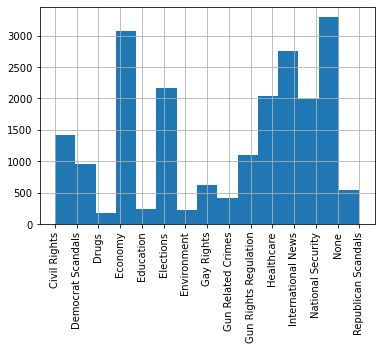

In [83]:
df['primary.topic'].hist(xrot=90, bins=df['primary.topic'].nunique());

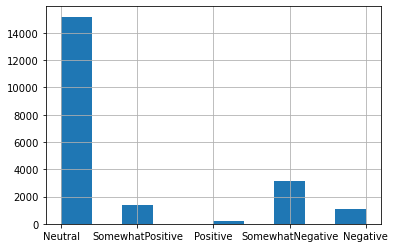

In [65]:
df['republican.vote'].hist();

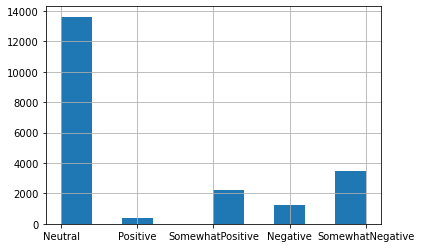

In [62]:
df['democrat.vote'].hist();

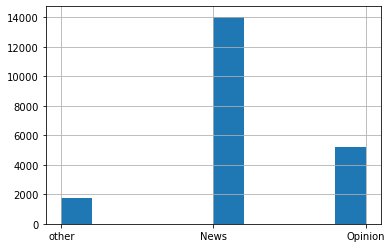

In [67]:
df['q3'].hist();

In [59]:
df['republican.vote'].unique()

array(['Neutral', 'SomewhatPositive', 'Positive', 'SomewhatNegative',
       'Negative'], dtype=object)

## Scraping

In [18]:
# n = last csv nb + 500
n = 500
step = 500

while n <= 21004:

    urls = df.url[n:n+step]

    d = []
    for url in tqdm(urls):

        article = Article(url)
        try: 
            article.download()
            article.parse()
        except:
            pass

        d.append(
            {
                'url': url,
                'date': article.publish_date,
                'author': article.authors,
                'title': article.title,
                'text': article.text
                #'image': article.top_image
            })

    df_tmp = pd.DataFrame(d)
    #df_text = pd.concat([df_text, df_tmp])
    df_tmp.to_csv('data/temp/text_'+ str(n) +'.csv', index=False)

    n += step

 66%|██████▌   | 331/500 [05:57<03:45,  1.34s/it]C:\Users\user\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 433 bytes but only got 0. Skipping tag 33432
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
 43%|████▎     | 214/500 [04:33<04:02,  1.18it/s]C:\Users\user\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname CST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
 35%|███▌      | 176/500 [02:53<04:49,  1.12it/s]C:\Users\user\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 2. 
 

In [ ]:
#df_articles.date = df_articles.date.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d T%H:%M:%S'))
#df_articles

In [ ]:
#df_text = pd.DataFrame()
#df_text = pd.concat([df_text, df_tmp])
#df_text.to_csv('text.scv', index=False)

In [34]:
df_text = pd.DataFrame()
n = 0
while n <= 21000:
    df_text = pd.concat([df_text, pd.read_csv(f'data/temp/text_{n}.csv')])
    n += 500

df_text.reset_index(drop=True, inplace=True)

In [56]:
df_text['perceived'] = df['perceived']
dz = df.merge(df_text, on=['url', 'perceived'])
dz

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,source,date,author,title,text
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,usatoday,2013-07-15 00:00:00,[],Zimmerman verdict renews focus on 'stand your ...,Maggie Clark\n\nPew/Stateline Staff Writer\n\n...
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,huffingtonpost,NaN,[],NaN,NaN
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,washingtonpost,2013-06-28 00:00:00,"['David Cole', 'June', 'David Cole Is The Nati...",Don’t let DOMA fool you — the Supreme Court is...,David Cole is a professor of constitutional la...
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,foxnews,2013-04-03 00:00:00,"['Jim Angle', 'Jim Angle Currently Serves As C...",ObamaCare in Trouble? Exchange provision delay...,"Parts of ObamaCare are starting to fray, even ..."
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,breitbart,2013-10-09 00:00:00,['Matthew Boyle'],Exclusive: Immigration Agents Rip House Lawmak...,U.S. Immigration Citizenship and Immigration S...
...,...,...,...,...,...,...,...,...,...,...,...,...
20999,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,washingtonpost,2013-02-13 00:00:00,"['Dana Milbank', 'Opinion Columnist Covering N...",Dana Milbank: Senators turn the tables on Caym...,President Obama won reelection in part by beat...
21000,http://news.yahoo.com/republicans-hatred-obama...,Opinion,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,yahoo,NaN,[],Republicans’ Hatred of Obama Blinds Them to Pu...,"Red-faced Republicans, circling and preparing ..."
21001,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,Neutral,Neutral,washingtonpost,2013-12-10,"['Dana Milbank', 'Opinion Columnist Covering N...",Dana Milbank: Stockman steps forward as Republ...,Rep. Steve Stockman’s moment as a viable Senat...
21002,http://www.washingtonpost.com/opinions/ej-dion...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,washingtonpost,2013-02-17,"['E.J. Dionne Jr.', 'Columnist Covering Nation...",E.J. Dionne: When Republicans were problem-sol...,We interrupt this highly partisan and ideologi...


In [57]:
dz.to_csv('data/newsArticlesWithLabelsAndText.csv', index=False)